# Explore here

In [1]:
# Your code here
import pandas as pd

df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

In [2]:
df_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df_raw.to_csv('../data/raw/df_raw.csv')

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#duplicados

df_raw.duplicated().sum()

np.int64(0)

In [ ]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
columnas = df_raw.columns.tolist()
columnas

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

*Análisis univariante*

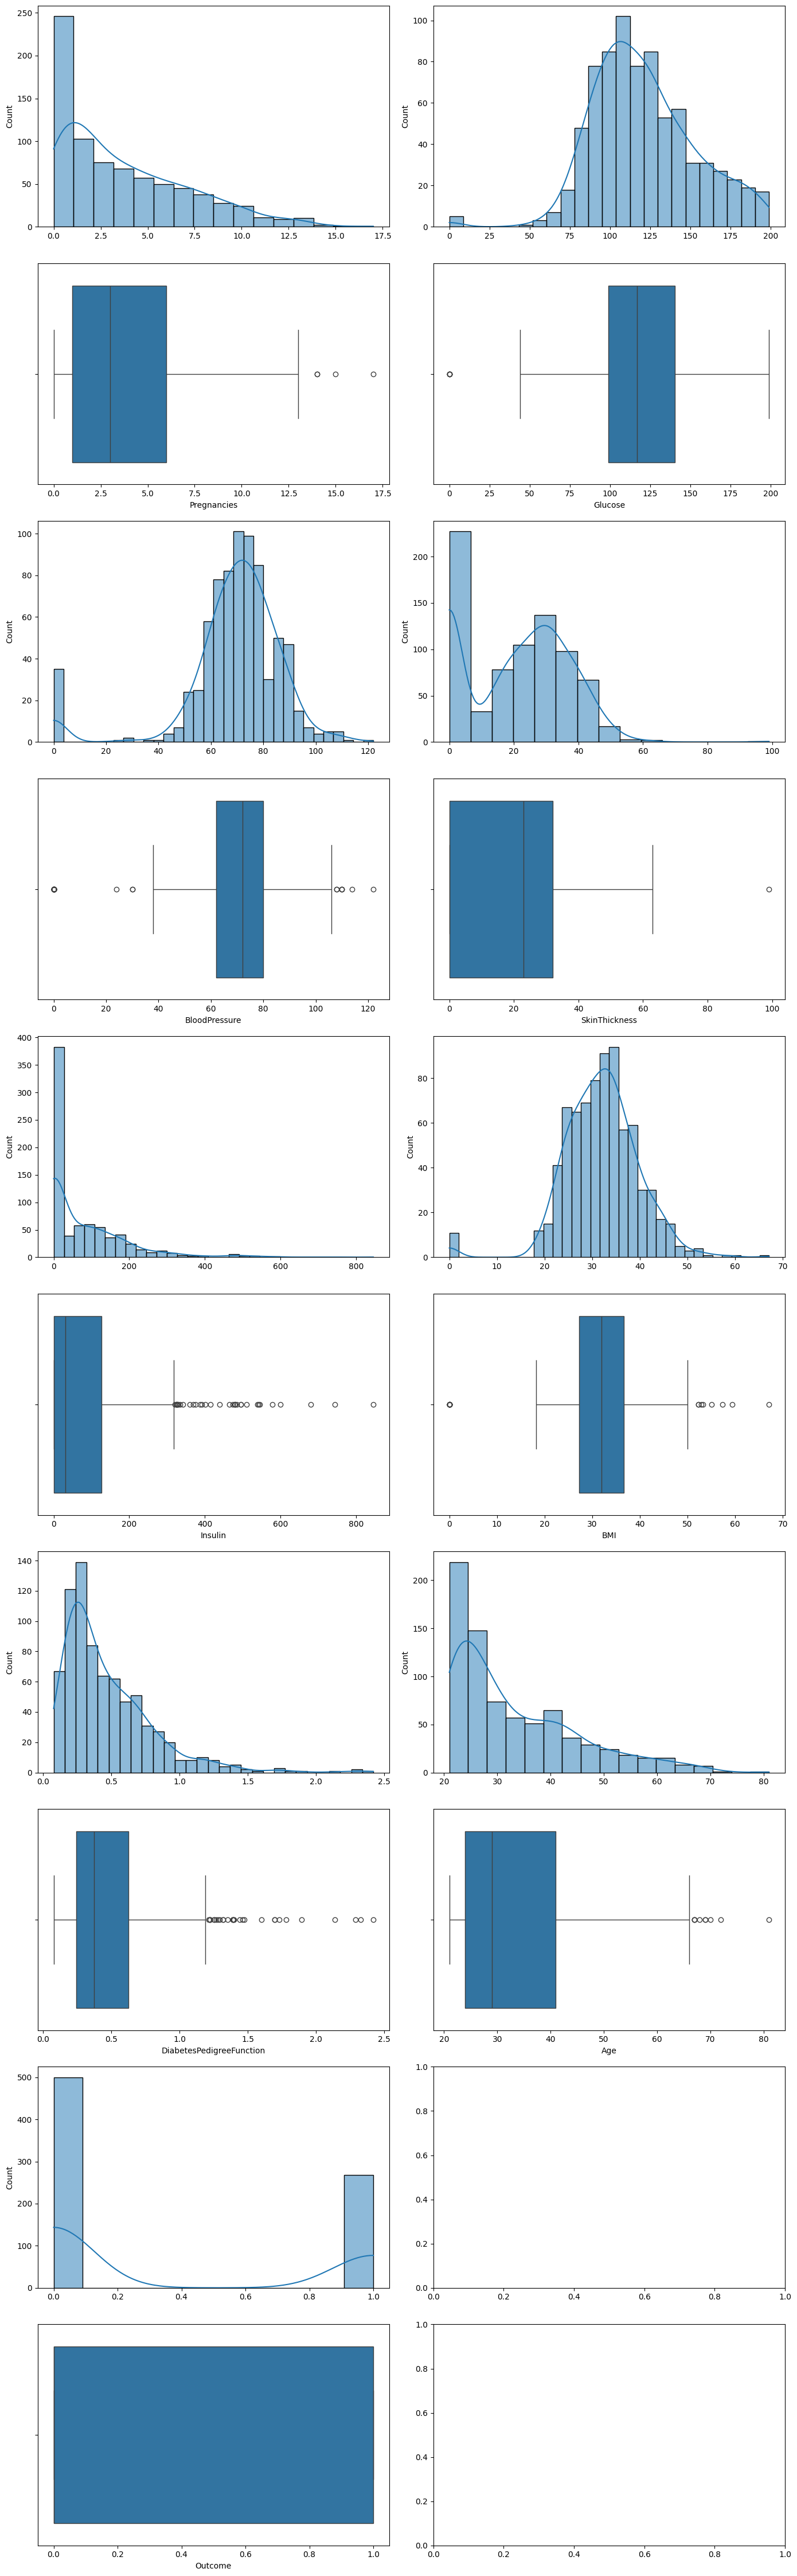

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(10, 2 , figsize=(14, 45))

for i, col in enumerate(columnas):
    if i % 2 == 0 :
        sns.histplot(ax = axis[i, 0], data = df_raw, x = col, kde=True).set(xlabel=None)
        sns.boxplot(ax = axis[i + 1, 0 ], data = df_raw, x = col)
    else :
        sns.histplot(ax=axis[i - 1, 1], data = df_raw, x = col, kde=True).set(xlabel=None)
        sns.boxplot(ax=axis[i , 1 ], data = df_raw, x = col)


plt.tight_layout()
plt.show()

En general, las variables presentan diferentes distribuciones, por lo que será necesario normalizar antes de hacer el modelo.

'Insulin' y 'DiabetesPedigreeFunction' parecen ser las variables más "dispersas" (+ outliers)

<Axes: >

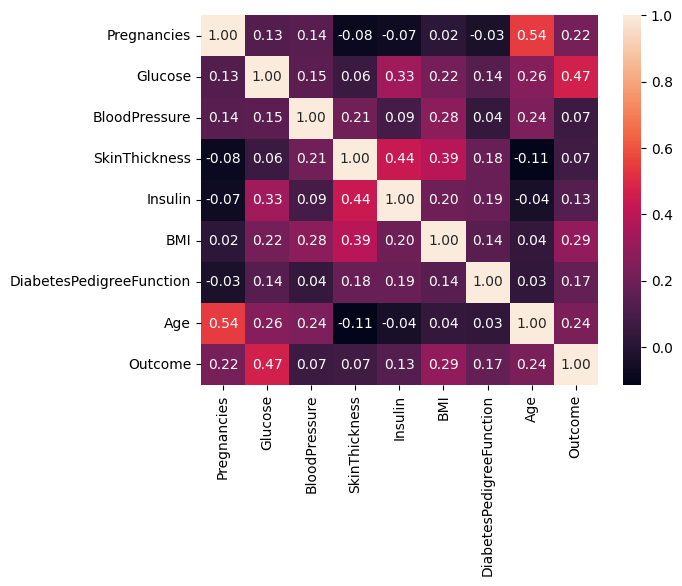

In [ ]:
sns.heatmap(df_raw.corr(), annot=True, fmt='.2f')

*Ingeniería de características*


**outliers**

In [10]:
df = df_raw.copy()

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


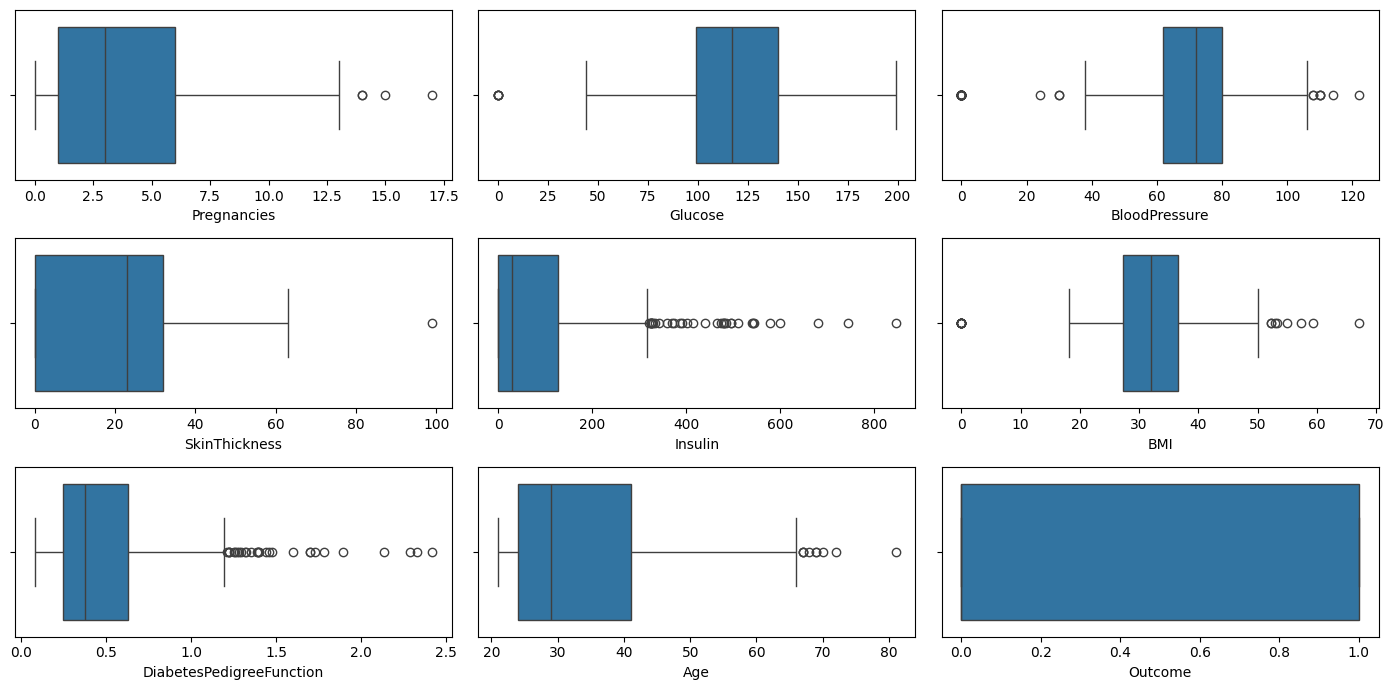

In [12]:
fig, axis = plt.subplots(3, 3, figsize = (14, 7))

for i, num in enumerate(columnas):
    row, col = i // 3, i % 3
    sns.boxplot(ax=axis[row,col], data=df[columnas], x=num)

plt.tight_layout()
plt.show()

In [13]:
def analisis_ric(columna, df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'{columna} --> lim_inferior: {lim_inf}, lim_superior: {lim_sup}')

In [ ]:
for col in columnas:
    analisis_ric(col, df)

Pregnancies --> lim_inferior: -6.5, lim_superior: 13.5
Glucose --> lim_inferior: 37.125, lim_superior: 202.125
BloodPressure --> lim_inferior: 35.0, lim_superior: 107.0
SkinThickness --> lim_inferior: -48.0, lim_superior: 80.0
Insulin --> lim_inferior: -190.875, lim_superior: 318.125
BMI --> lim_inferior: 13.35, lim_superior: 50.550000000000004
DiabetesPedigreeFunction --> lim_inferior: -0.32999999999999996, lim_superior: 1.2
Age --> lim_inferior: -1.5, lim_superior: 66.5
Outcome --> lim_inferior: -1.5, lim_superior: 2.5


In [15]:
(df['Pregnancies']>13.5).sum()

np.int64(4)

In [16]:
print(f'df sin eliminar registros de Pregnancies: {df.shape}')
df = df[df['Pregnancies'] < 13.5]
print(f'df con registros eliminados de Pregnancies: {df.shape}')

df sin eliminar registros de Pregnancies: (768, 9)
df con registros eliminados de Pregnancies: (764, 9)


In [17]:
(df['Glucose']==0).sum()

np.int64(5)

In [18]:
print(f'df sin eliminar registros de Glucose: {df.shape}')
df = df[df['Glucose'] > 0]
print(f'df con registros eliminados de Glucose: {df.shape}')

df sin eliminar registros de Glucose: (764, 9)
df con registros eliminados de Glucose: (759, 9)


In [19]:
(df['BloodPressure']==0).sum()

np.int64(35)

In [20]:
print(f'df sin eliminar registros de BloodPressure: {df.shape}')
df = df[df['BloodPressure'] > 0]
print(f'df con registros eliminados de BloodPressure: {df.shape}')

df sin eliminar registros de BloodPressure: (759, 9)
df con registros eliminados de BloodPressure: (724, 9)


In [21]:
(df['SkinThickness'].isin([0, 99])).sum()

np.int64(195)

In [22]:
(df['SkinThickness']==99).sum()

np.int64(1)

In [23]:
print(f'df sin eliminar registros de SkinThickness: {df.shape}')
df = df[df['SkinThickness'] < 99]
print(f'df con registros eliminados de SkinThickness: {df.shape}')

df sin eliminar registros de SkinThickness: (724, 9)
df con registros eliminados de SkinThickness: (723, 9)


In [24]:
(df['BMI']==0).sum()

np.int64(4)

In [25]:
print(f'df sin eliminar registros de BMI: {df.shape}')
df = df[df['BMI'] > 0]
print(f'df con registros eliminados de BMI: {df.shape}')

df sin eliminar registros de BMI: (723, 9)
df con registros eliminados de BMI: (719, 9)


In [ ]:
(df['DiabetesPedigreeFunction']>1.5).sum()

np.int64(9)

In [27]:
print(f'df sin eliminar registros de DiabetesPedigreeFunction: {df.shape}')
df = df[df['DiabetesPedigreeFunction'] < 1.5]
print(f'df con registros eliminados de DiabetesPedigreeFunction: {df.shape}')

df sin eliminar registros de DiabetesPedigreeFunction: (719, 9)
df con registros eliminados de DiabetesPedigreeFunction: (710, 9)


In [28]:
(df['Insulin']>318.125).sum()

np.int64(32)

In [29]:
print(f'df sin eliminar registros de Insulin: {df.shape}')
df = df[df['Insulin'] <= 318.125]
print(f'df con registros eliminados de Insulin: {df.shape}')

df sin eliminar registros de Insulin: (710, 9)
df con registros eliminados de Insulin: (678, 9)


In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,678.000000,678.00000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,3.831858,119.70649,72.536873,20.637168,65.865782,32.254425,0.455013,33.235988,0.327434
std,3.279413,29.68656,12.371202,15.445178,79.839544,6.817102,0.287850,11.713987,0.469623
min,0.000000,44.00000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.00000,64.000000,0.000000,0.000000,27.300000,0.245000,24.000000,0.000000
50%,3.000000,114.50000,72.000000,23.000000,36.500000,32.000000,0.369000,29.000000,0.000000
75%,6.000000,137.00000,80.000000,32.000000,120.000000,36.300000,0.605000,41.000000,1.000000
max,13.000000,199.00000,122.000000,60.000000,318.000000,67.100000,1.476000,81.000000,1.000000


In [31]:
(df['Insulin']==0).sum()

np.int64(327)

*Al identificarse desde un principio que este dataframe no presentaba nulos, con el tratamiento de outliers quedaría listo para modelar*

In [32]:
df_clean = df.copy()
df_clean.to_csv('../data/processed/df_clean.csv')

**Modelo**

In [33]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(['Outcome'], axis=1)
y = df_clean['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
492,4,99,68,38,0,32.8,0.145,33
283,7,161,86,0,0,30.4,0.165,47
250,9,106,52,0,0,31.2,0.380,42
24,11,143,94,33,146,36.6,0.254,51
278,5,114,74,0,0,24.9,0.744,57


<Axes: >

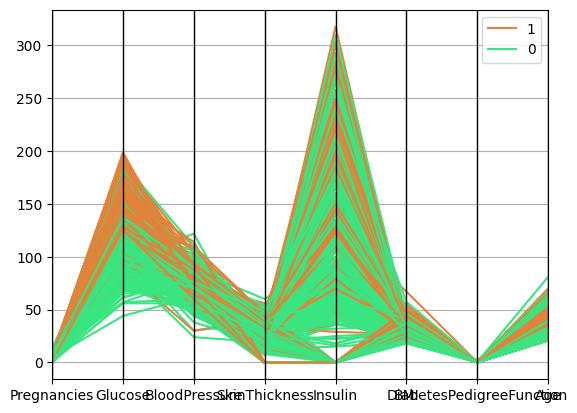

In [34]:
pd.plotting.parallel_coordinates(df, 'Outcome', color = ('#E58139', '#39E581'))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scal = scaler.fit_transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = X_test.columns)

X_train_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
492,0.307692,0.300699,0.448980,0.633333,0.000000,0.298569,0.044299,0.200000
283,0.538462,0.734266,0.632653,0.000000,0.000000,0.249489,0.058824,0.433333
250,0.692308,0.349650,0.285714,0.000000,0.000000,0.265849,0.214960,0.350000
24,0.846154,0.608392,0.714286,0.550000,0.459119,0.376278,0.123457,0.500000
278,0.384615,0.405594,0.510204,0.000000,0.000000,0.137014,0.479303,0.600000


In [36]:
total_data = X_train_scal
total_data['Outcome']= y_train

<Axes: >

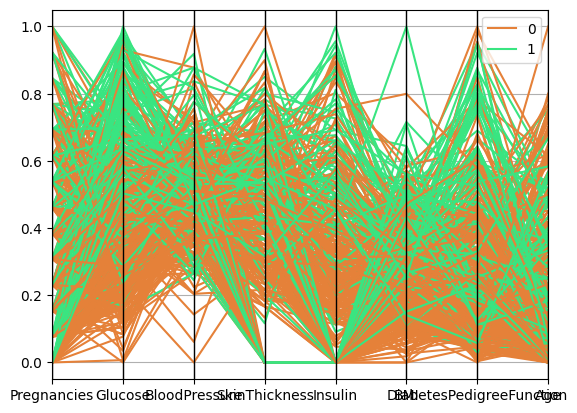

In [37]:
pd.plotting.parallel_coordinates(total_data, 'Outcome', color = ('#E58139', '#39E581'))

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

selection_model = SelectKBest(score_func = f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,4.0,99.0,32.8,0.145,33.0
1,7.0,161.0,30.4,0.165,47.0
2,9.0,106.0,31.2,0.380,42.0
3,11.0,143.0,36.6,0.254,51.0
4,5.0,114.0,24.9,0.744,57.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_sel, y_train)

DecisionTreeClassifier(random_state=42)

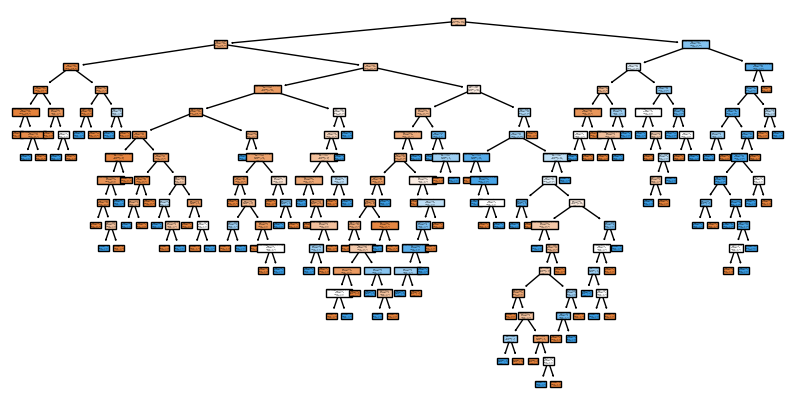

In [40]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10,5))

tree.plot_tree(model, feature_names = list(X_train_sel.columns), class_names = ['0','1'], filled = True)

plt.show()

In [41]:
y_pred = model.predict(X_test_sel)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7058823529411765

In [43]:
from sklearn.model_selection import GridSearchCV

grilla ={
    'max_depth': [5,6,7,8,9,10,11,15],
    'min_samples_split': [2,3,4,5,6],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grilla_search = GridSearchCV(model, grilla, n_jobs=2, scoring='accuracy')

In [44]:
resultados = grilla_search.fit(X_train_sel, y_train)
resultados.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 4}

In [45]:
mejor_modelo = resultados.best_estimator_

In [46]:
y_pred2 = mejor_modelo.predict(X_test_sel)

In [47]:
accuracy_score(y_test, y_pred2)

0.7205882352941176

*Al eliminar outliers, se obtiene un accuracy muy bajo. Se utilizará el dataframe con outliers ("df_raw")*

In [48]:
X2 = df_raw.drop(['Outcome'], axis=1)
y2 = df_raw['Outcome']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

X_train2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [49]:
selection_model = SelectKBest(score_func = f_classif, k = 5)
selection_model.fit(X_train2, y_train2)
ix = selection_model.get_support()

X_train_sel2 = pd.DataFrame(selection_model.transform(X_train2), columns = X_train2.columns.values[ix])
X_test_sel2 = pd.DataFrame(selection_model.transform(X_test2), columns = X_test2.columns.values[ix])

X_train_sel2.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.304,21.0
1,9.0,112.0,28.2,1.282,50.0
2,1.0,139.0,28.7,0.654,22.0
3,0.0,161.0,21.9,0.254,65.0
4,6.0,134.0,46.2,0.238,46.0


In [50]:
model2 = DecisionTreeClassifier(random_state = 42)
model2.fit(X_train_sel2, y_train2)
y_pred3 = model2.predict(X_test_sel2)
y_pred3

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [51]:
print(f'accuracy model 2: {accuracy_score(y_test2, y_pred3)}')

accuracy model 2: 0.7077922077922078


*se obtuvo un mejor accuracy score usando el df con outliers, se seguirá trabajando con model 2*

In [52]:
from sklearn.model_selection import GridSearchCV

grid ={
    'max_depth': [5,6,7,8,9,10,11,15],
    'min_samples_split': [2,3,4,5,6],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_search = GridSearchCV(model2, grid, n_jobs=2, scoring='accuracy')

In [53]:
result = grid_search.fit(X_train_sel2, y_train2)

In [54]:
result.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [55]:
best_model = result.best_estimator_

In [56]:
y_pred4 = best_model.predict(X_test_sel2)

In [57]:
print(f'accuracy best model: {accuracy_score(y_test2, y_pred4)}')

accuracy best model: 0.7857142857142857


In [58]:
from pickle import dump

dump(best_model, open("../models/decision_tree_regressor_42.sav", "wb"))